In [1]:
import rec
import numpy as np

# The SIR model can be initialized with no parameters
sir = rec.SIRModel()

Infection state:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Old infection state:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
New infections:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Infected users to add:
 [19 19 19 ... 19 19 19]
Nodes: 1
Edges: 0


In [2]:
# Or we can specify parameters
sir = rec.SIRModel(num_users=10, num_items=100)
print("Num items", sir.num_items)
print("Num users", sir.num_users)

Infection state:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
# Or better yet, we can specify our own representations for items and users,
# which were otherwise randomly generated.
# This has constraints that depend on the model

# user_representation must be a social graph
# Soon it'll be possible to define this easily with a SocialGraph class, but for now:
num_users, num_items = 5, 1
user_representation = np.diag(np.diag(np.ones((num_users, num_users))))
                      #rec.Distribution('binom', p=.3, n=1,
                      #                size=(num_users, num_users)).compute()

# item_representation is an array of probabilities of infection:
# Similarly, this will become a Probability class that can take any distribution. For now:
item_representation = rec.Distribution('uniform', size=(1, num_items)).compute()

# And now we initialize the new model
sir = rec.SIRModel(item_representation=item_representation,
                  user_representation=user_representation)
sir.add_friends(0,4)
sir.add_friends(0,3)
sir.add_friends(1,4)
print("Item attributes \n", sir.item_attributes)
print("User profiles\n", sir.user_profiles)

Infection state:
 [[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
Old infection state:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
New infections:
 [[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
Infected users to add:
 [2]
Nodes: 1
Edges: 0
Item attributes 
 [[0.7279528]]
User profiles
 [[1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1.]]


In [4]:
# We can also define the initial infection state -- that is, which user has been infected by which item
# before the simulation starts.
# Note that the model does not currently support modifying the parameters after initialization.
# So we need to initialize a new model altogether.

# But first, the initial infection state:
# (this will also be simplified, but I'm not sure how yet)
infection_state = np.zeros((num_users, num_items))
infection_state[np.random.randint(num_users), np.random.randint(num_items)] = 1
sir = rec.SIRModel(item_representation=item_representation,
                  user_representation=user_representation,
                  infection_state=np.copy(infection_state)) # this is to check if the infection state has changed
print("Initial infection state\n", sir.infection_state)

Infection state:
 [[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
Old infection state:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
New infections:
 [[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
Infected users to add:
 [4]
Nodes: 1
Edges: 0
Initial infection state
 [[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [5]:
# We could also specify an infection threshold, which specifies what is the minimum probability
# that the user will become 'infected' with items.
# Right now, infection_threshold is a scalar constant, but
# it will soon support arrays with a potentially different threshold for each user.
# For the purpose of this tutorial, we leave it to the system to select a threshold randomly:
print("The infection threshold is", sir.infection_threshold)

The infection threshold is 0.6153604388886497


In [6]:
# Now we run the model. This can be run without parameters, too.
# But we decide to run it for only 10 timesteps
timesteps = 3
sir.run(timesteps=timesteps)

Infection state:
 [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
Old infection state:
 [[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
New infections:
 [[1.]
 [1.]
 [0.]
 [0.]
 [0.]]
Infected users to add:
 [0 1]
Nodes: 3
Edges: 2
Infection state:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]]
Old infection state:
 [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
New infections:
 [[0.]
 [0.]
 [0.]
 [1.]
 [0.]]
Infected users to add:
 [3]
Nodes: 4
Edges: 3
Infection state:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]]
Old infection state:
 [[1.]
 [1.]
 [0.]
 [1.]
 [1.]]
New infections:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Nodes: 4
Edges: 3


In [7]:
# Now we can take a look at the infection state and see if it's different from
# the initial state. If it is not, we could run it for some other step, but maybe
# the threshold is too high or the social graph too sparse.
has_changed = not np.array_equal(sir.infection_state, infection_state)
response = "yes!" if has_changed else "nope."
print("Has the infection state changed?", response)

Has the infection state changed? yes!


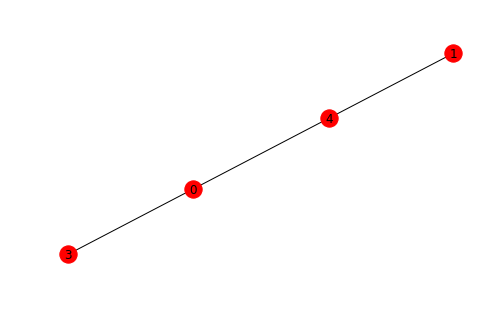

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(sir.measurements[0].diffusion_tree, with_labels=True)
plt.show()

In [10]:
sir.infection_state

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [ ]:
# The measurements are collected by calling:
measurements = sir.get_measurements()
# Note that the MSE is currently not meaningful. Normally, the MSE compares the user preferences predicted
# by the model with the users' actual preferences. The "actual preferences" in this case would be
# the "actual probabilities of users being infected," different from the ones estimated by the model.
# First of all, I am not sure that is at all meaningful in this context (maybe if we have actual data and we
# want to validate the model?). Second, I currently have a way to calculate actual preferences that is only
# compatible with ContentFiltering.
measurements.head()

In [ ]:
# I currently don't have a "frontend" that plots, but it's relatively easy to generate simple plots.
# A practical plotting module is also on my TODO list.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(timesteps), measurements['Homogeneity'])
plt.title("Homogeneity measure")
plt.xlabel("timesteps")
plt.ylabel("homogeneity")
plt.show()

In [ ]:
# And now a hacky way to measure the new infections per iteration
# This will be integrated soon in the measurements module.

# Let's reset the model
sir = rec.SIRModel(item_representation=item_representation,
                  user_representation=user_representation,
                  infection_state=infection_state)

# We define a class that does measurements specifically for the SIR model
from rec import Measurements
class SIRMeasurements(Measurements):
    def __init__(self, default_increment = 20, verbose=False):
        self.new_cases = np.zeros(default_increment)
        self._infection_state_old = None
        super().__init__(default_increment=default_increment, verbose=verbose)

    def measure(self, infection_state, num_users, num_items):
        self._measure_new_cases(infection_state, num_users, num_items)
        self._index += 1

    def _measure_new_cases(self, infection_state, num_users, num_items):
        if self.new_cases is None or self._index >= self.new_cases.size:
            self.new_cases = self._expand_array(self.new_cases)
        if self._infection_state_old is None:
            self._infection_state_old = np.zeros((num_users, num_items))
        # num. new infections:
        difference = (np.where(infection_state == 1)[0].shape[0] - 
                      np.where(self._infection_state_old == 1)[0].shape[0])
        self.new_cases[self._index] = difference
        self._infection_state_old = np.copy(infection_state)

timesteps = 100
sir_measurements = SIRMeasurements()
for step in range(timesteps):
    sir.run(timesteps=1)
    sir_measurements.measure(sir.infection_state, sir.num_users,
                            sir.num_items)

plt.plot(np.arange(timesteps), sir_measurements.new_cases[:sir_measurements._index])
plt.show()